<a href="https://colab.research.google.com/github/heriswn/LatihanDTS/blob/master/Final_Project_Balancing_SMOTE_(Size_mean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> FINAL PROJECT
    

# Importing Data

In [0]:
import warnings
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv('googleplaystore.csv')

In [76]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# Data Preparation

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Checking Data

### Check Data Unique

In [78]:
for colum in data.columns:
    print(colum,':\n',data[colum].unique())
    print()

App :
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

Category :
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Rating :
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

Reviews :
 ['159' '967' '87510' ... '603' '1195' '

In [79]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [80]:
data[data.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Droping Unclear Data

In [81]:
data=data.drop(10472,axis=0)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Dropping Columns Less Effect

In [82]:
data=data.drop(columns=['Type','Last Updated','Current Ver','Android Ver'],axis=1)
data

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",0,Everyone,Art & Design;Creativity


## Missing Value

### Finding Missing Value

In [83]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count+=1

if count>0:
    print(count,'Rows have Missing Value')

1474 Rows have Missing Value


In [84]:
for colum in data.columns:
    missed=data[data[colum].isnull()==True].shape[0]
    if missed>0:
        print('Attribute ',colum,': ',missed)
    else:
        print('Attribute ',colum,': No Missing Value')

Attribute  App : No Missing Value
Attribute  Category : No Missing Value
Attribute  Rating :  1474
Attribute  Reviews : No Missing Value
Attribute  Size : No Missing Value
Attribute  Installs : No Missing Value
Attribute  Price : No Missing Value
Attribute  Content Rating : No Missing Value
Attribute  Genres : No Missing Value


### Replace the Missing Value

In [85]:
for colum in data.columns:
    if (data[data[colum].isnull()].shape[0]>0):
        print('\nAttribute-',colum,' (before) :',data[data[colum].isnull()].shape[0])
        if (data[colum].dtypes in ['int64','float64']):
            data[colum].fillna(data[data[colum].notnull()][colum].mean(), inplace=True)
        else:
            data[colum].fillna(data[data[colum].notnull()][colum].mode(), inplace=True)
        print('\nAttribute-',colum,' (after) :',data[data[colum].isnull()].shape[0])


Attribute- Rating  (before) : 1474

Attribute- Rating  (after) : 0


In [86]:
data

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,"50,000+",0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19M,"50,000+",0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29M,"1,000,000+",0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33M,"1,000,000+",0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1M,"10,000+",0,Everyone,Art & Design;Creativity


## Data Type

### Rating

In [87]:
data.Rating.dtype

dtype('float64')

### Reviews

In [88]:
data.Reviews.dtype

dtype('O')

In [89]:
data.Reviews

0           159
1           967
2         87510
3        215644
4           967
5           167
6           178
7         36815
8         13791
9           121
10        13880
11         8788
12        44829
13         4326
14         1518
15           55
16         3632
17           27
18       194216
19       224399
20          450
21          654
22         7699
23           61
24          118
25          192
26        20260
27          203
28          136
29          223
          ...  
10811         4
10812        80
10813        20
10814       785
10815      5775
10816         2
10817       885
10818        96
10819        52
10820        22
10821         6
10822         0
10823         1
10824        67
10825         7
10826     88486
10827       117
10828       291
10829       603
10830       881
10831        38
10832      1195
10833        44
10834         7
10835         0
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 1

In [0]:
data.Reviews=data.Reviews.astype('int64')

### Size

In [91]:
data.Size.dtype

dtype('O')

In [92]:
data.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
                ...        
10811                  3.9M
10812                   13M
10813                  2.7M
10814                   31M
10815               

In [0]:
k_indices=data.Size.loc[data.Size.str.contains('k')].index.tolist()
converter=pd.DataFrame(data.loc[k_indices,'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

In [94]:
data.Size=data.Size.apply(lambda x: x.strip('M'))
data.Size=data.Size.apply(lambda x: x.strip('Varies with device'))
data.Size=data.Size.replace('','NaN')
data.Size=data.Size.astype('float64')
data.Size

0        19.000
1        14.000
2         8.700
3        25.000
4         2.800
5         5.600
6        19.000
7        29.000
8        33.000
9         3.100
10       28.000
11       12.000
12       20.000
13       21.000
14       37.000
15        2.700
16        5.500
17       17.000
18       39.000
19       31.000
20       14.000
21       12.000
22        4.200
23        7.000
24       23.000
25        6.000
26       25.000
27        6.100
28        4.600
29        4.200
          ...  
10811     3.900
10812    13.000
10813     2.700
10814    31.000
10815     4.900
10816     6.800
10817     8.000
10818     1.500
10819     3.600
10820     8.600
10821     2.500
10822     3.100
10823     2.900
10824    82.000
10825     7.700
10826       NaN
10827    13.000
10828    13.000
10829     7.400
10830     2.300
10831     9.800
10832     0.568
10833     0.604
10834     2.600
10835     9.600
10836    53.000
10837     3.600
10838     9.500
10839       NaN
10840    19.000
Name: Size, Length: 1084

In [95]:
data.Size.value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
17.000    160
19.000    154
16.000    149
26.000    149
10.000    146
25.000    143
20.000    139
21.000    138
24.000    136
18.000    133
23.000    117
22.000    114
29.000    103
27.000     97
28.000     95
30.000     84
33.000     79
3.300      77
37.000     76
35.000     72
31.000     70
2.900      69
2.500      68
2.300      68
2.800      65
         ... 
0.486       1
0.150       1
0.033       1
0.233       1
0.217       1
0.736       1
0.883       1
0.840       1
0.024       1
0.761       1
0.502       1
0.817       1
0.204       1
0.871       1
0.321       1
0.711       1
0.182       1
0.362       1
0.513       1
0.314       1
0.281       1
0.952       1
0.448       1
0.195       1
0.153       1
0.932       1
0.556       1
0.628       1
0.539       1
0.660       1
Name: Size, Length: 457, dtype: int64

In [0]:
data['Size'] = data['Size'].fillna(data['Size'].mean())

In [97]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",0,Everyone,Art & Design;Creativity


### Installs

In [98]:
data.Installs.dtype

dtype('O')

In [99]:
data.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
5            50,000+
6            50,000+
7         1,000,000+
8         1,000,000+
9            10,000+
10        1,000,000+
11        1,000,000+
12       10,000,000+
13          100,000+
14          100,000+
15            5,000+
16          500,000+
17           10,000+
18        5,000,000+
19       10,000,000+
20          100,000+
21          100,000+
22          500,000+
23          100,000+
24           50,000+
25           10,000+
26          500,000+
27          100,000+
28           10,000+
29          100,000+
            ...     
10811           100+
10812         1,000+
10813        10,000+
10814        50,000+
10815       500,000+
10816           100+
10817       100,000+
10818        10,000+
10819         5,000+
10820         1,000+
10821            50+
10822            10+
10823           100+
10824        10,000+
10825           100+
10826     5,000,000+
10827        

In [100]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.astype('int64')
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
5           50000
6           50000
7         1000000
8         1000000
9           10000
10        1000000
11        1000000
12       10000000
13         100000
14         100000
15           5000
16         500000
17          10000
18        5000000
19       10000000
20         100000
21         100000
22         500000
23         100000
24          50000
25          10000
26         500000
27         100000
28          10000
29         100000
           ...   
10811         100
10812        1000
10813       10000
10814       50000
10815      500000
10816         100
10817      100000
10818       10000
10819        5000
10820        1000
10821          50
10822          10
10823         100
10824       10000
10825         100
10826     5000000
10827        5000
10828       10000
10829       10000
10830      100000
10831        5000
10832      100000
10833        1000
10834         500
10835     

### Price

In [101]:
data.Price.dtype

dtype('O')

In [102]:
data.Price

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
10811    0
10812    0
10813    0
10814    0
10815    0
10816    0
10817    0
10818    0
10819    0
10820    0
10821    0
10822    0
10823    0
10824    0
10825    0
10826    0
10827    0
10828    0
10829    0
10830    0
10831    0
10832    0
10833    0
10834    0
10835    0
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object

In [103]:
data.Price=data.Price.apply(lambda x: x.strip('$'))
data.Price=data.Price.astype('float64')
data.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
10811    0.0
10812    0.0
10813    0.0
10814    0.0
10815    0.0
10816    0.0
10817    0.0
10818    0.0
10819    0.0
10820    0.0
10821    0.0
10822    0.0
10823    0.0
10824    0.0
10825    0.0
10826    0.0
10827    0.0
10828    0.0
10829    0.0
10830    0.0
10831    0.0
10832    0.0
10833    0.0
10834    0.0
10835    0.0
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [104]:
data.Installs.value_counts().sort_index()

0               15
1               67
5               82
10             386
50             205
100            719
500            330
1000           907
5000           477
10000         1054
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: Installs, dtype: int64

In [105]:
data

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600000,50000,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000000,50000,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000000,1000000,0.0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000000,1000000,0.0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100000,10000,0.0,Everyone,Art & Design;Creativity


### Labeling Popularity Apps

In [0]:
data['Popularity']=data.apply(lambda row:'Very Not Popular' if (row['Installs']<50) 
                                         else('Not Popular' if ((row['Installs']>=50) and (row['Installs']<5000))
                                              else('Ordinary' if ((row['Installs']>=5000) and (row['Installs']<500000))
                                                   else('Popular' if ((row['Installs']>=500000) and (row['Installs']<50000000))
                                                        else 'Very popular'))),axis=1)

In [107]:
data

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,0.0,Everyone,Art & Design,Ordinary
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,0.0,Everyone,Art & Design;Pretend Play,Popular
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,0.0,Everyone,Art & Design,Popular
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,0.0,Teen,Art & Design,Very popular
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,0.0,Everyone,Art & Design;Creativity,Ordinary
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.600000,50000,0.0,Everyone,Art & Design,Ordinary
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.000000,50000,0.0,Everyone,Art & Design,Ordinary
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.000000,1000000,0.0,Everyone,Art & Design,Popular
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.000000,1000000,0.0,Everyone,Art & Design,Popular
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.100000,10000,0.0,Everyone,Art & Design;Creativity,Ordinary


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null float64
Installs          10840 non-null int64
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Popularity        10840 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [109]:
data=data.drop(columns=['App','Category'],axis=1)
data=data.drop(columns='Installs',axis=1)
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000000,0.0,Everyone,Art & Design,Ordinary
1,3.900000,967,14.000000,0.0,Everyone,Art & Design;Pretend Play,Popular
2,4.700000,87510,8.700000,0.0,Everyone,Art & Design,Popular
3,4.500000,215644,25.000000,0.0,Teen,Art & Design,Very popular
4,4.300000,967,2.800000,0.0,Everyone,Art & Design;Creativity,Ordinary
5,4.400000,167,5.600000,0.0,Everyone,Art & Design,Ordinary
6,3.800000,178,19.000000,0.0,Everyone,Art & Design,Ordinary
7,4.100000,36815,29.000000,0.0,Everyone,Art & Design,Popular
8,4.400000,13791,33.000000,0.0,Everyone,Art & Design,Popular
9,4.700000,121,3.100000,0.0,Everyone,Art & Design;Creativity,Ordinary


In [110]:
data.Popularity.value_counts()

Popular             4122
Ordinary            3179
Not Popular         2161
Very popular         828
Very Not Popular     550
Name: Popularity, dtype: int64

## Encoding

In [0]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

### Content Rating

In [112]:
data['Content Rating']=LabelEncoder().fit_transform(data['Content Rating'])
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000000,0.0,1,Art & Design,Ordinary
1,3.900000,967,14.000000,0.0,1,Art & Design;Pretend Play,Popular
2,4.700000,87510,8.700000,0.0,1,Art & Design,Popular
3,4.500000,215644,25.000000,0.0,4,Art & Design,Very popular
4,4.300000,967,2.800000,0.0,1,Art & Design;Creativity,Ordinary
5,4.400000,167,5.600000,0.0,1,Art & Design,Ordinary
6,3.800000,178,19.000000,0.0,1,Art & Design,Ordinary
7,4.100000,36815,29.000000,0.0,1,Art & Design,Popular
8,4.400000,13791,33.000000,0.0,1,Art & Design,Popular
9,4.700000,121,3.100000,0.0,1,Art & Design;Creativity,Ordinary


### Genres

In [113]:
data['Genres']=LabelEncoder().fit_transform(data['Genres'])
data

,Rating,Reviews,Size,Price,Content Rating,Genres,Popularity
0,4.100000,159,19.000000,0.0,1,9,Ordinary
1,3.900000,967,14.000000,0.0,1,12,Popular
2,4.700000,87510,8.700000,0.0,1,9,Popular
3,4.500000,215644,25.000000,0.0,4,9,Very popular
4,4.300000,967,2.800000,0.0,1,11,Ordinary
5,4.400000,167,5.600000,0.0,1,9,Ordinary
6,3.800000,178,19.000000,0.0,1,9,Ordinary
7,4.100000,36815,29.000000,0.0,1,9,Popular
8,4.400000,13791,33.000000,0.0,1,9,Popular
9,4.700000,121,3.100000,0.0,1,11,Ordinary


### Correlation

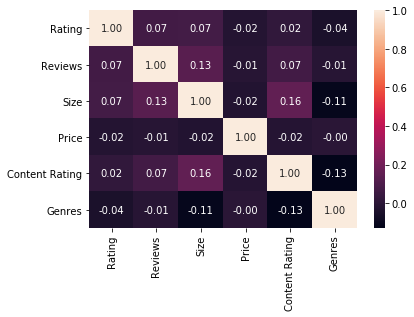

In [114]:
corr=data.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

# Modelling

In [0]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Data Target

In [0]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [117]:
pd.value_counts(pd.Series(Y))

Popular             4122
Ordinary            3179
Not Popular         2161
Very popular         828
Very Not Popular     550
dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity')]

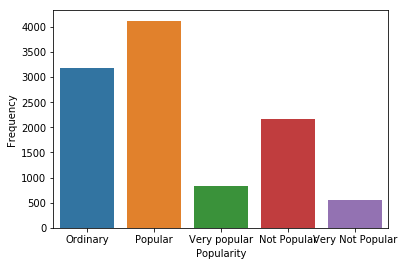

In [118]:
sns.countplot(data.Popularity).set(xlabel='Popularity', ylabel='Frequency')

### Balancing Data

In [119]:
y_train.shape

(8672,)

In [120]:
x_train.shape

(8672, 6)

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm=SMOTE(random_state=123)
x_train_re,y_train_re=sm.fit_resample(x_train,y_train)

In [123]:
pd.value_counts(pd.Series(y_train))

Popular             3298
Ordinary            2543
Not Popular         1729
Very popular         662
Very Not Popular     440
dtype: int64

In [124]:
pd.value_counts(pd.Series(y_train_re))

Not Popular         3298
Popular             3298
Ordinary            3298
Very Not Popular    3298
Very popular        3298
dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity (After Balancing)')]

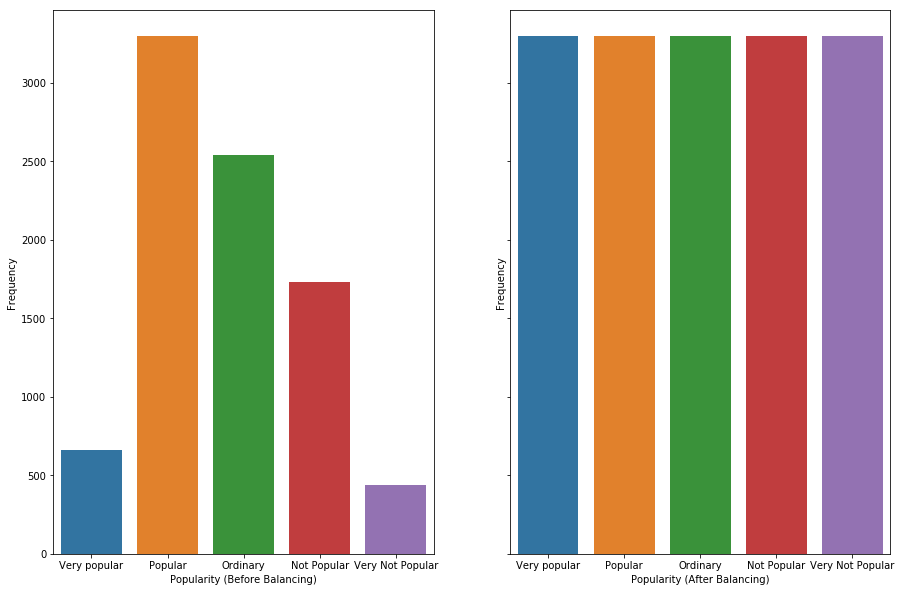

In [125]:
f,axes=plt.subplots(1,2,figsize=(15,10),sharex=True,sharey=True)

sns.countplot(y_train,ax=axes[0]).set(xlabel='Popularity (Before Balancing)', ylabel='Frequency')
sns.countplot(y_train_re,ax=axes[1]).set(xlabel='Popularity (After Balancing)', ylabel='Frequency')

# Experiment

## KNN Models

### Training and Testing Model

#### Find the Best Parameter for KNN Model

In [0]:
paramknn={
    'n_neighbors':[5,6,7,8,9,10],
    'leaf_size':[1,2,3,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree','kd_tree','brute'],
    'n_jobs':[-1]
}

In [0]:
knn_parameters=[]

In [150]:
modelknn=KNeighborsClassifier(n_jobs=-1)
modelknn_best=GridSearchCV(modelknn,param_grid=paramknn,n_jobs=-1)
modelknn_best.fit(x_train,y_train)
knn_parameters.append(modelknn_best.best_params_)
knn_parameters[0]

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 9,
 'weights': 'distance'}

In [129]:
modelknn_re=KNeighborsClassifier(n_jobs=-1)
modelknn_re_best=GridSearchCV(modelknn_re,param_grid=paramknn,n_jobs=-1)
modelknn_re_best.fit(x_train_re,y_train_re)
knn_parameters.append(modelknn_re_best.best_params_)
knn_parameters[1]

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 6,
 'weights': 'distance'}

In [0]:
def modelknn(nneigh,leafsize,weight,algo,njob):
    model=KNeighborsClassifier(n_neighbors=nneigh,leaf_size=leafsize,weights=weight,algorithm=algo,n_jobs=njob)
    return model

In [0]:
model_knn=[]

In [0]:
model_knn.append(modelknn(9,1,'distance','ball_tree',-1))

In [141]:
train=model_knn[0].fit(x_train,y_train)
predicted=train.predict(x_test)
print("KNN (Before Balancing) :\n", classification_report(y_test,predicted))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted))

KNN (Before Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.74      0.77      0.75       432
        Ordinary       0.79      0.80      0.79       636
         Popular       0.88      0.88      0.88       824
Very Not Popular       0.57      0.48      0.52       110
    Very popular       0.84      0.82      0.83       166

        accuracy                           0.81      2168
       macro avg       0.76      0.75      0.76      2168
    weighted avg       0.81      0.81      0.81      2168



Confusion Matrix:

[[331  62   0  39   0]
 [ 59 506  71   0   0]
 [  0  75 723   1  25]
 [ 56   1   0  53   0]
 [  0   0  30   0 136]]


In [142]:
train_re=model_knn[0].fit(x_train_re,y_train_re)
predicted_re=train_re.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_re))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.72      0.69      0.71       432
        Ordinary       0.78      0.78      0.78       636
         Popular       0.89      0.84      0.86       824
Very Not Popular       0.47      0.65      0.54       110
    Very popular       0.76      0.87      0.81       166

        accuracy                           0.78      2168
       macro avg       0.72      0.77      0.74      2168
    weighted avg       0.79      0.78      0.79      2168



Confusion Matrix:

[[299  55   0  78   0]
 [ 78 495  62   1   0]
 [  0  86 690   1  47]
 [ 38   1   0  71   0]
 [  0   0  21   0 145]]


In [0]:
model_knn.append(modelknn(6,1,'distance','auto',-1))

In [144]:
train_re=model_knn[1].fit(x_train,y_train)
predicted_2=train_re.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_2))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.77      0.75       432
        Ordinary       0.80      0.80      0.80       636
         Popular       0.89      0.89      0.89       824
Very Not Popular       0.53      0.42      0.47       110
    Very popular       0.87      0.83      0.85       166

        accuracy                           0.81      2168
       macro avg       0.76      0.74      0.75      2168
    weighted avg       0.81      0.81      0.81      2168



Confusion Matrix:

[[334  58   0  40   0]
 [ 61 509  66   0   0]
 [  0  71 732   1  20]
 [ 63   1   0  46   0]
 [  0   0  29   0 137]]


In [145]:
train_re=model_knn[1].fit(x_train_re,y_train_re)
predicted_re_2=train_re.predict(x_test)
print("KNN (After Balancing) :\n", classification_report(y_test,predicted_re_2))
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predicted_re_2))

KNN (After Balancing) :
                   precision    recall  f1-score   support

     Not Popular       0.73      0.69      0.71       432
        Ordinary       0.78      0.79      0.78       636
         Popular       0.90      0.83      0.86       824
Very Not Popular       0.48      0.68      0.56       110
    Very popular       0.75      0.89      0.81       166

        accuracy                           0.79      2168
       macro avg       0.73      0.78      0.75      2168
    weighted avg       0.80      0.79      0.79      2168



Confusion Matrix:

[[297  55   0  80   0]
 [ 76 502  57   1   0]
 [  0  88 685   1  50]
 [ 34   1   0  75   0]
 [  0   0  19   0 147]]


### KFold

In [0]:
def modfoldclass(x,y,n):
    for i in range(len(model_knn)):
        kf=KFold(n_splits=n)
        kf.get_n_splits(x)
        model=model_knn[i]
        j=0
        accuracy=[]
        print('Parameter:',knn_parameters[i],'\n')
        print('Hasil dari model KNN:\n')
        for train_index,test_index in kf.split(x):
            X_train,X_test=x[train_index],x[test_index]
            Y_train,Y_test=y[train_index],y[test_index]
            
            sm=SMOTE(random_state=123)
            X_train_re,Y_train_re=sm.fit_resample(X_train,Y_train)
            
            model.fit(X_train_re,Y_train_re)
            Y_pred=model.predict(X_test)
            
            accuracy.append(accuracy_score(Y_test,Y_pred))
            print('Subset',j+1,'accuracy= ',accuracy[j])
            j+=1
            
        print('Average accuracy= ',np.mean(accuracy))
        print('\n\n')

In [147]:
modfoldclass(X,Y,5)

Parameter: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8214944649446494
Subset 2 accuracy=  0.8191881918819188
Subset 3 accuracy=  0.7518450184501845
Subset 4 accuracy=  0.7393911439114391
Subset 5 accuracy=  0.7509225092250923
Average accuracy=  0.7765682656826568



Parameter: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'} 

Hasil dari model KNN:

Subset 1 accuracy=  0.8284132841328413
Subset 2 accuracy=  0.8261070110701108
Subset 3 accuracy=  0.7527675276752768
Subset 4 accuracy=  0.753690036900369
Subset 5 accuracy=  0.7615313653136532
Average accuracy=  0.7845018450184502





IndexError: ignored